In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import pylab 

# This allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned.tsv.gz')
Cleaned_Data.head()

,Dataset_Name,Method_Name,Test_Score,n_neighbors,weights
0,soybean,KNeighborsClassifier,0.540698,100,distance
1,soybean,KNeighborsClassifier,0.563953,100,distance
2,soybean,KNeighborsClassifier,0.540698,100,distance
3,soybean,KNeighborsClassifier,0.540698,100,distance
4,soybean,KNeighborsClassifier,0.488372,100,distance


In [3]:
Cleaned_Data.shape

(2340, 5)

In [5]:
Cleaned_Data['weights_categorical'] = Cleaned_Data.weights.map({'unifrom':0, 'distance':1})
Cleaned_Data.head()

,Dataset_Name,Method_Name,Test_Score,n_neighbors,weights,weights_categorical
0,soybean,KNeighborsClassifier,0.540698,100,distance,1
1,soybean,KNeighborsClassifier,0.563953,100,distance,1
2,soybean,KNeighborsClassifier,0.540698,100,distance,1
3,soybean,KNeighborsClassifier,0.540698,100,distance,1
4,soybean,KNeighborsClassifier,0.488372,100,distance,1


# Trials to plot Parameters against the Test Score

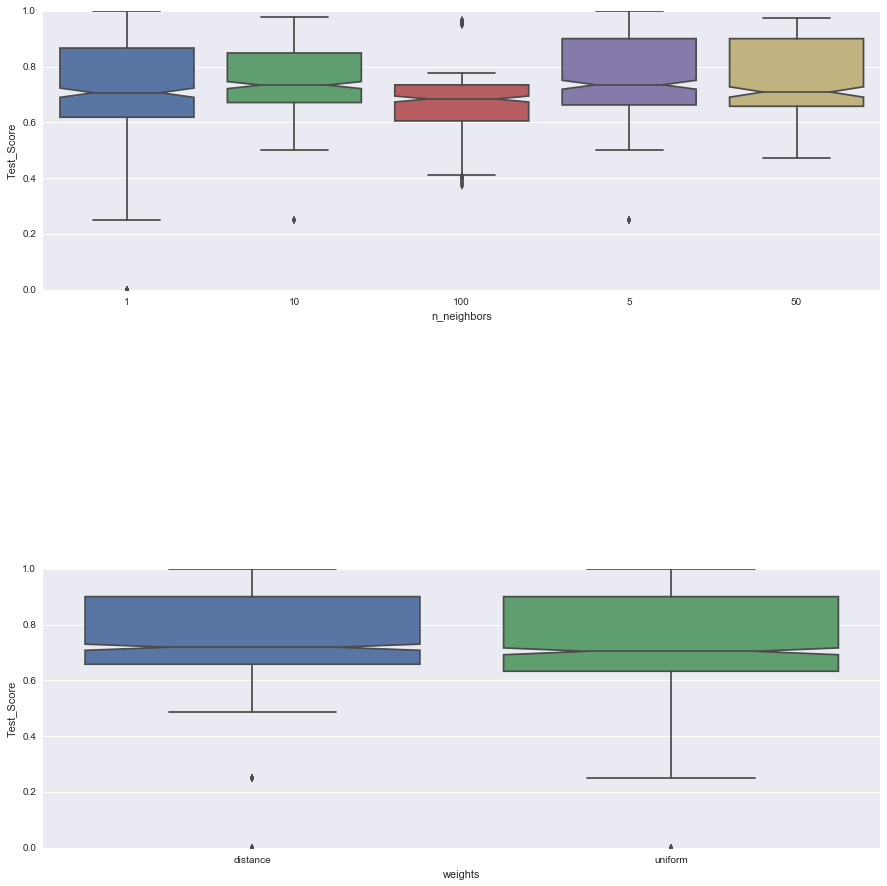

In [7]:
import seaborn as sns
sns.set()
fig, axs = plt.subplots(2,1, sharey=True, figsize=(15,15)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots

#boxplots
sns.boxplot(data=Cleaned_Data, x='n_neighbors', y='Test_Score', notch='T',ax=axs[0])
sns.boxplot(data=Cleaned_Data, x='weights', y='Test_Score', notch='T',ax=axs[1])


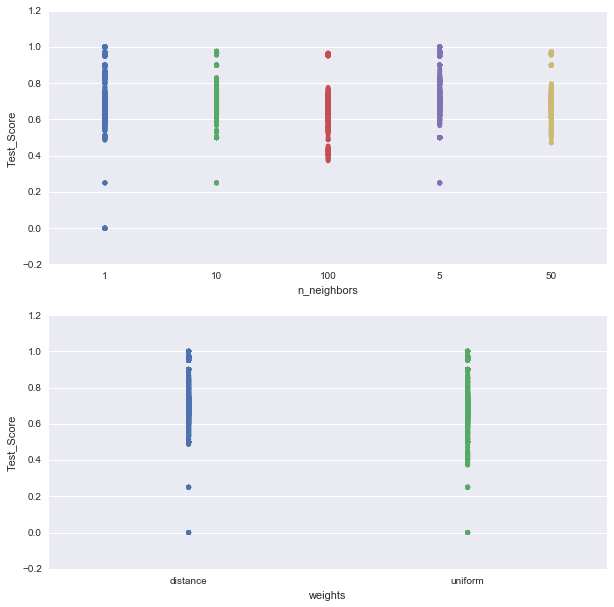

In [9]:
# Best for categorical variable or string type entry

fig, axs = plt.subplots(2,1, sharey=True, figsize=(10,10))

sns.stripplot(x="n_neighbors", y="Test_Score", data=Cleaned_Data, ax=axs[0])
sns.stripplot(x="weights", y="Test_Score", data=Cleaned_Data, ax=axs[1])


Analysis



# Linear Regression on Combined Dataset

In [10]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Test_Score ~ n_neighbors + weights', data=Cleaned_Data).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     11.61
Date:                Fri, 01 Apr 2016   Prob (F-statistic):           4.26e-11
Time:                        12:41:20   Log-Likelihood:                 943.39
No. Observations:                2340   AIC:                            -1875.
Df Residuals:                    2334   BIC:                            -1840.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.7288      0.008     94.299      0.000         0.714     0.744
n_neighbors[T.10]      0.0212      0.010      2.089      0.037         0.001     0.041
n_neighbors[T.100]    -0.0301      0.011     -2.731      0.006        -0.052    -0.008
n_neighbors[T.5]       0.0427      0.010      4.337      0.000         0.023     0.062
n_neighbors[T.50]      0.0248      0.011      2.357      0.019         0.004     0.045
weights[T.uniform]    -0.0183      0.007     -2.733      0.006        -0.031    -0.005
==============================================================================
Omnibus:                      196.774   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              406.117
Skew:                          -0.545   Prob(JB):                     6.50e-89
Kurtosis:                       4.726   Cond. No.                         6.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis

# Dividing the dataframe into independent datasets

In [11]:
Dataset_list=Cleaned_Data['Dataset_Name'].unique().tolist()
print(Dataset_list)
DatasetWiseData={}
for Dataset_name in Dataset_list:
    DatasetWiseData[Dataset_name] = Cleaned_Data[Cleaned_Data.Dataset_Name==Dataset_name]

['soybean', 'cars1', 'heart-c', 'solar-flare_1', 'pima', 'hypothyroid', 'shuttle-landing-control', 'sponge', 'trains']


In [21]:
# Save the file

import os
#os.mkdir('../Cleaned_Method_Wise_Data/DecisionTreeClassifier_cleaned')
DatasetWiseData['trains'].to_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/trains.tsv.gz')

In [ ]:
# Read the file

Dataset_DTC_Type = pd.read_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/cars1.tsv.gz')
print(Dataset_DTC_Type)

# Plot and Linear Regression Analysis performed dataset wise

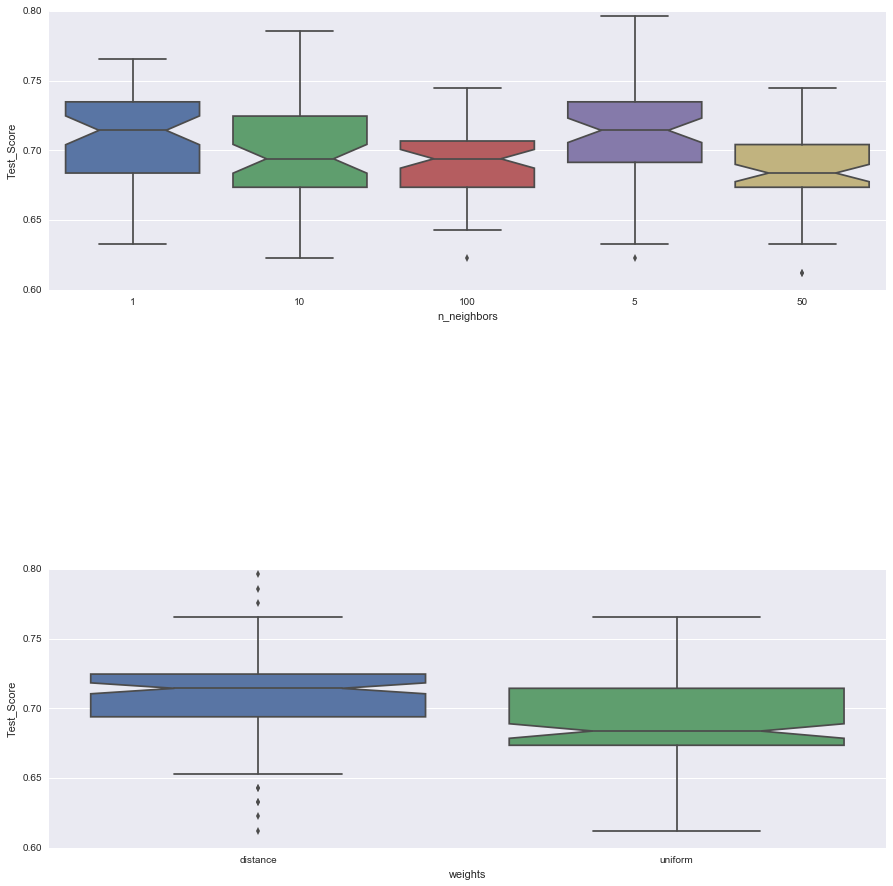

In [24]:

Dataset_Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/cars1.tsv.gz')
Dataset_Cleaned_Data.head()

#boxplots
fig, axs = plt.subplots(2,1, sharey=True, figsize=(15,15)) # 3 rows 1 column, figsize controls how big I want the fig to look
fig.subplots_adjust(hspace=1) # Give space between the subplots
sns.boxplot(data=Dataset_Cleaned_Data, x='n_neighbors', y='Test_Score', notch='T',ax=axs[0])
sns.boxplot(data=Dataset_Cleaned_Data, x='weights', y='Test_Score', notch='T',ax=axs[1])


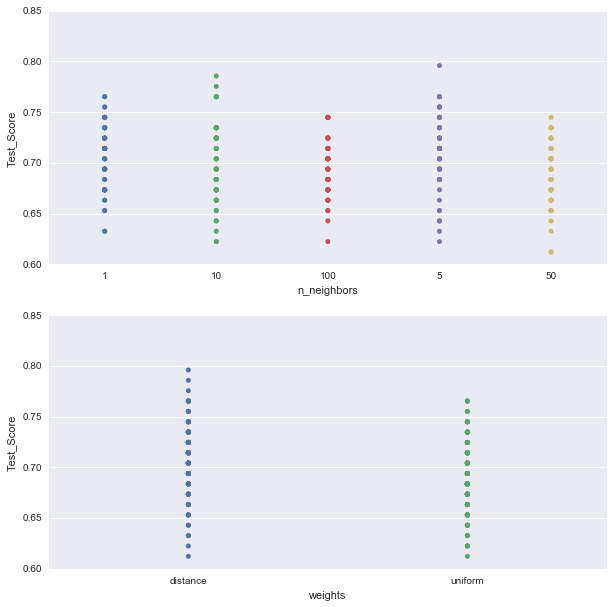

In [25]:

Dataset_Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/cars1.tsv.gz')
Dataset_Cleaned_Data.head()

#stripplots
fig, axs = plt.subplots(2,1, sharey=True, figsize=(10,10))
sns.stripplot(x="n_neighbors", y="Test_Score", data=Dataset_Cleaned_Data, ax=axs[0])
sns.stripplot(x="weights", y="Test_Score", data=Dataset_Cleaned_Data, ax=axs[1])


In [26]:

Dataset_Cleaned_Data = pd.read_pickle('../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/cars1.tsv.gz')
Dataset_Cleaned_Data.head()

#linear regression
lm = smf.ols(formula='Test_Score ~ n_neighbors + weights', data=Dataset_Cleaned_Data).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Test_Score   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     8.326
Date:                Fri, 01 Apr 2016   Prob (F-statistic):           2.24e-07
Time:                        12:54:33   Log-Likelihood:                 616.20
No. Observations:                 300   AIC:                            -1220.
Df Residuals:                     294   BIC:                            -1198.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.7159      0.004    161.509      0.000         0.707     0.725
n_neighbors[T.10]     -0.0075      0.006     -1.308      0.192        -0.019     0.004
n_neighbors[T.100]    -0.0131      0.006     -2.289      0.023        -0.024    -0.002
n_neighbors[T.5]       0.0015      0.006      0.267      0.789        -0.010     0.013
n_neighbors[T.50]     -0.0190      0.006     -3.329      0.001        -0.030    -0.008
weights[T.uniform]    -0.0174      0.004     -4.812      0.000        -0.025    -0.010
==============================================================================
Omnibus:                        1.875   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.626
Skew:                          -0.170   Prob(JB):                        0.443
Kurtosis:                       3.121   Cond. No.                         6.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis

cars1.tsv.gz
                 
                            OLS Regression Results                            
Dep. Variable:             Test_Score   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     8.326
Date:                Fri, 01 Apr 2016   Prob (F-statistic):           2.24e-07
Time:                        22:00:22   Log-Likelihood:                 616.20
No. Observations:                 300   AIC:                            -1220.
Df Residuals:                     294   BIC:                            -1198.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Inter

C:\Users\Akshay\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


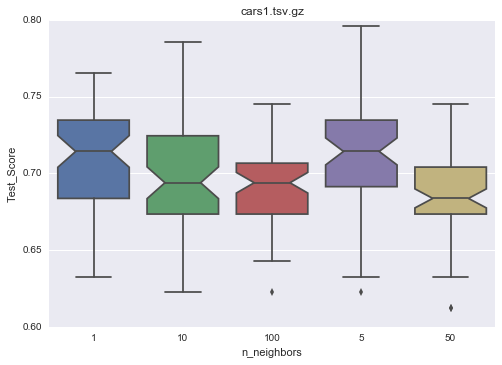

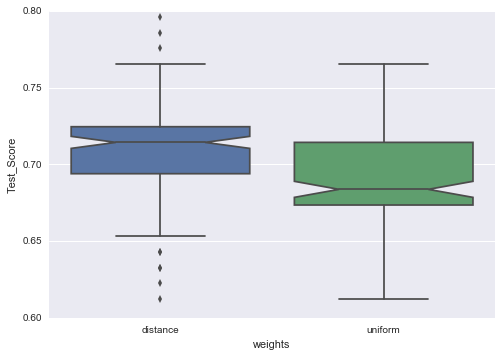

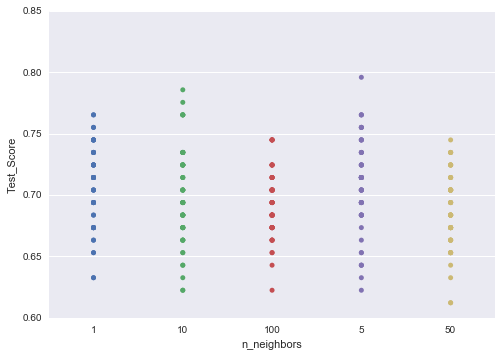

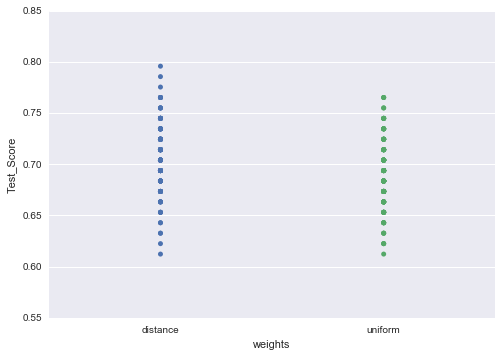

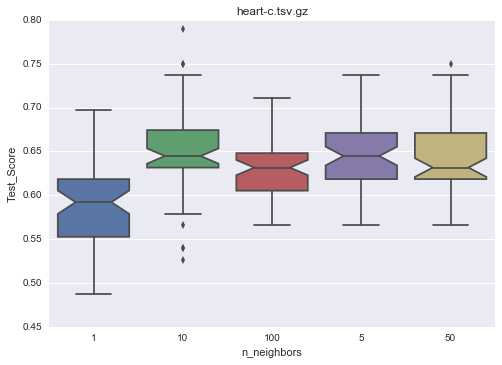

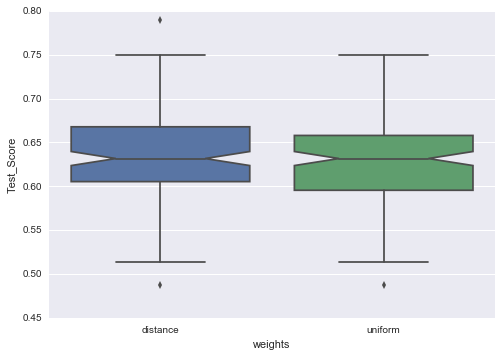

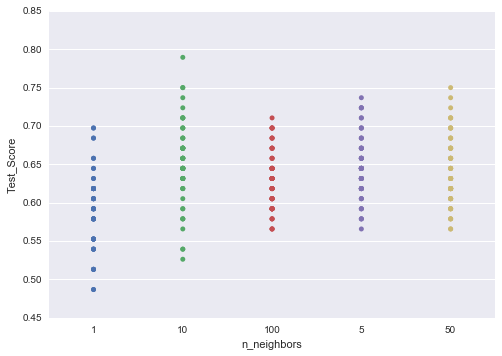

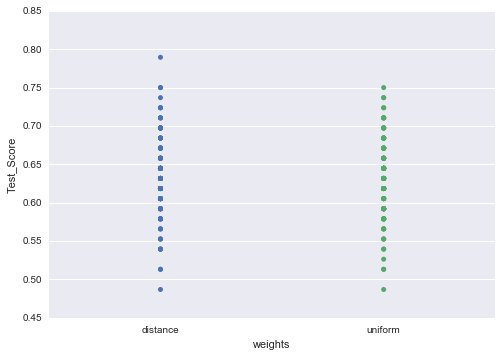

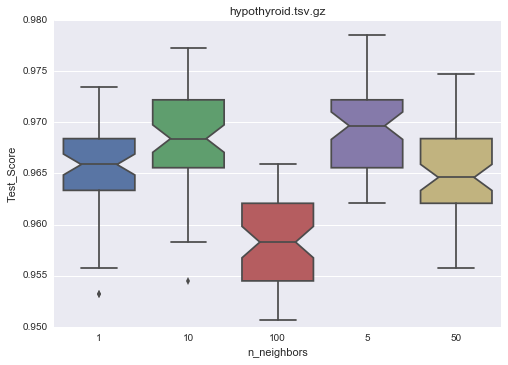

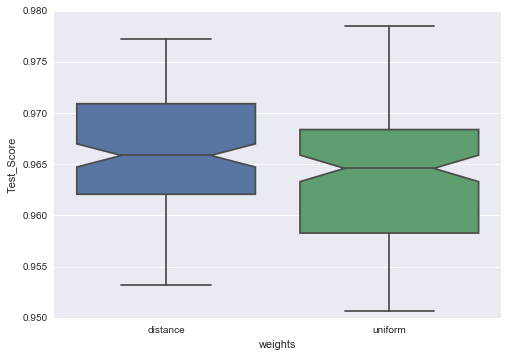

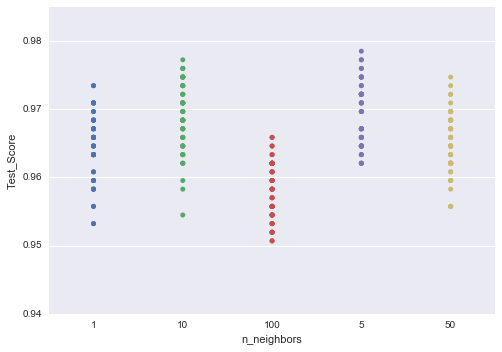

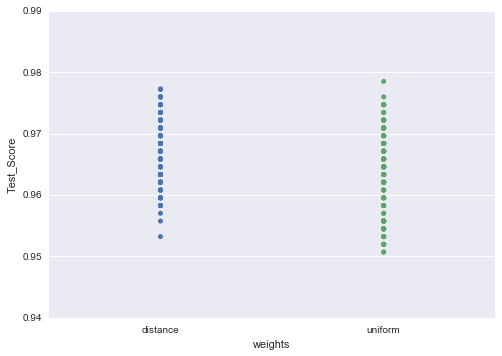

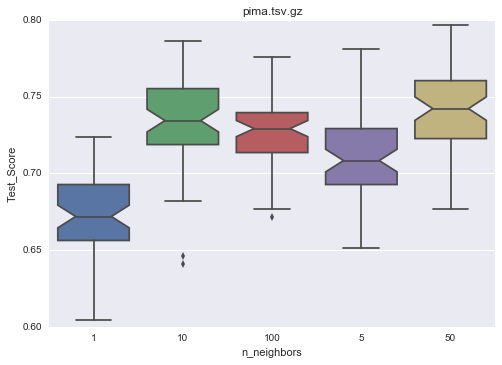

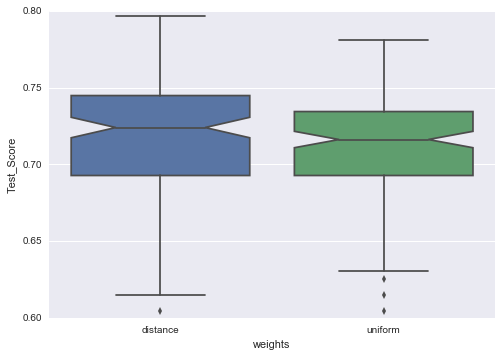

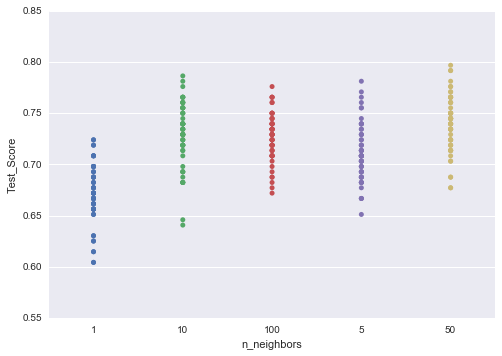

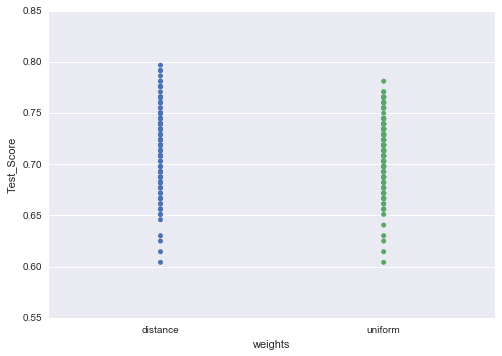

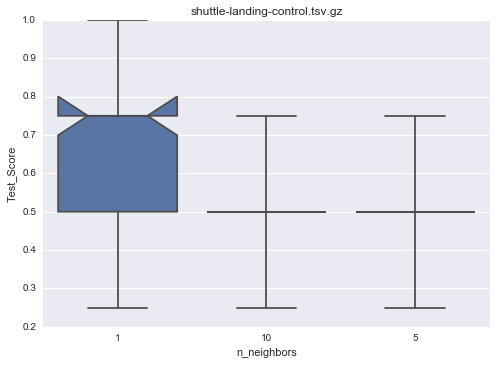

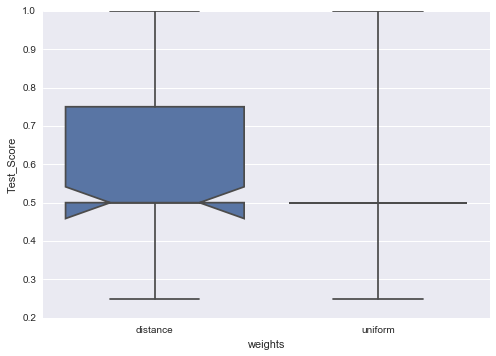

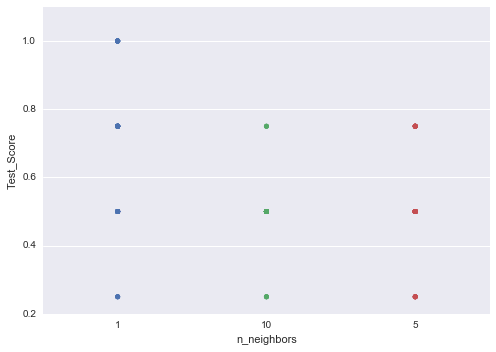

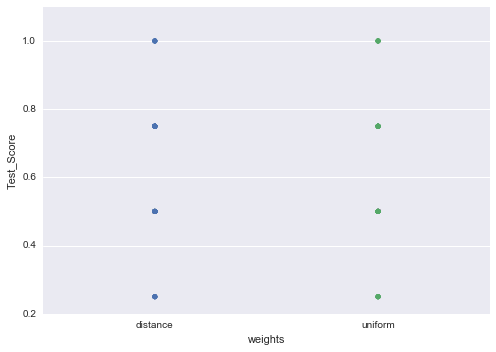

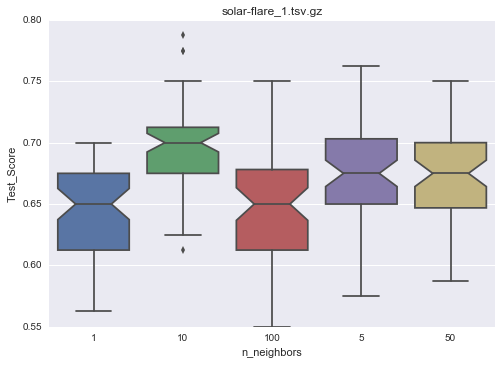

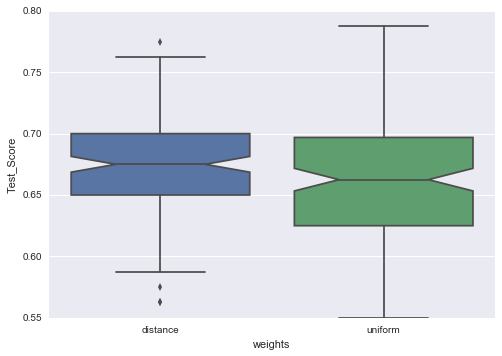

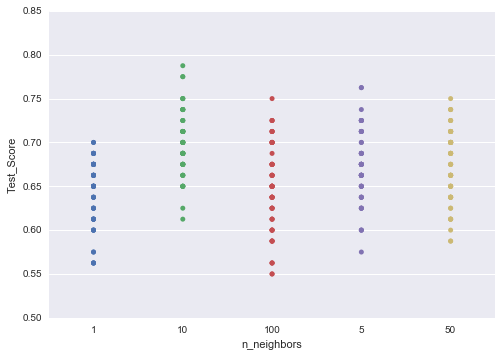

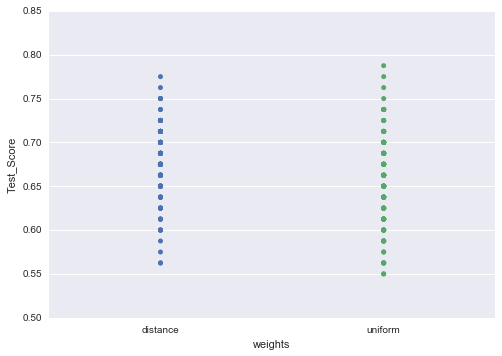

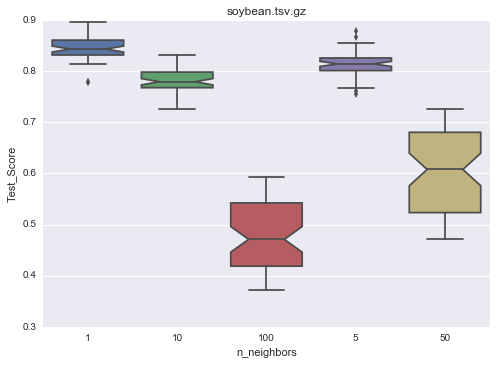

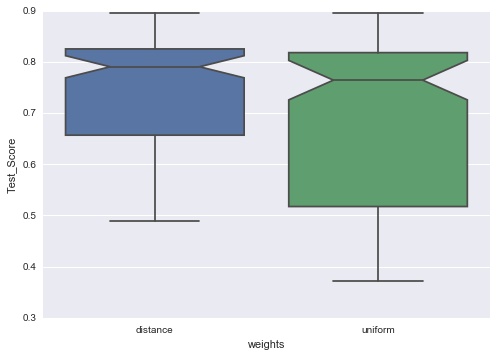

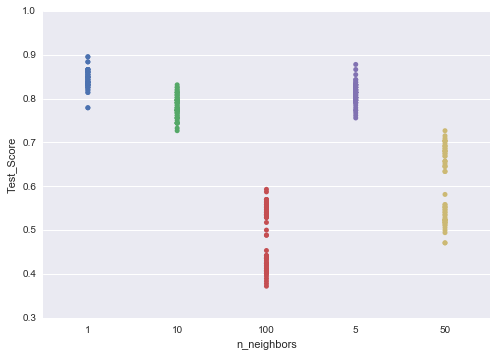

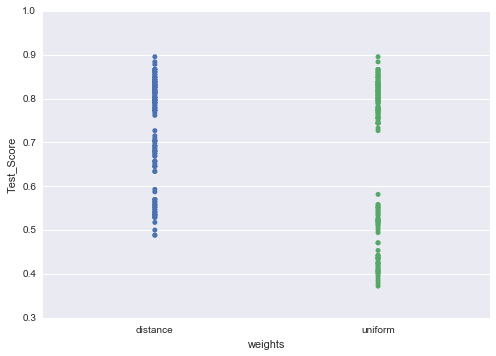

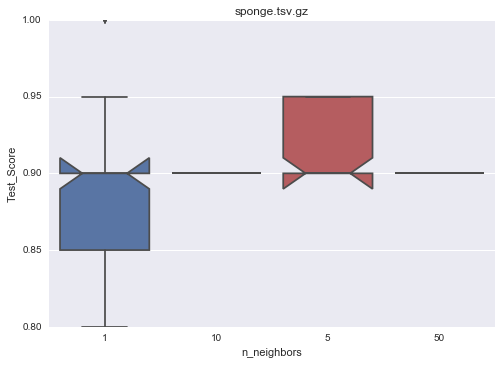

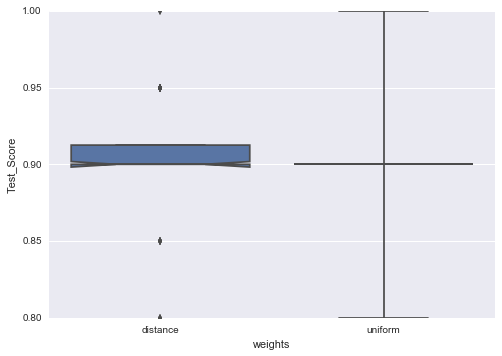

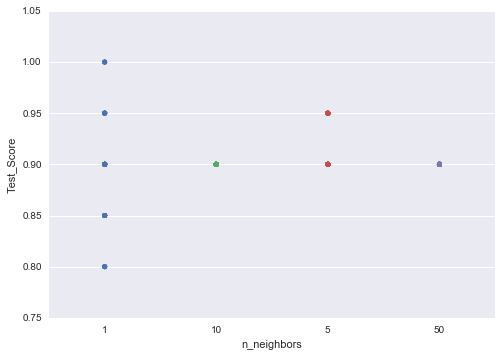

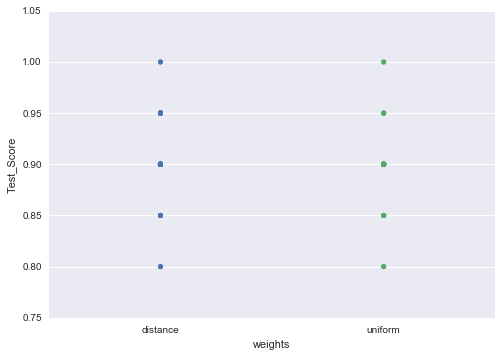

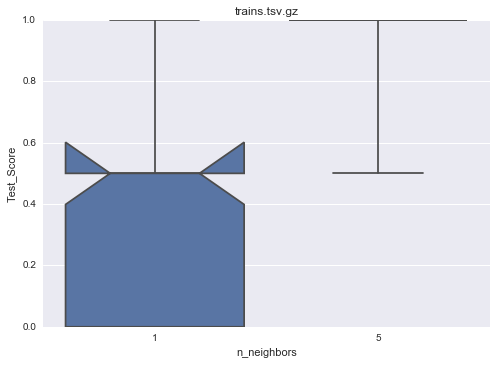

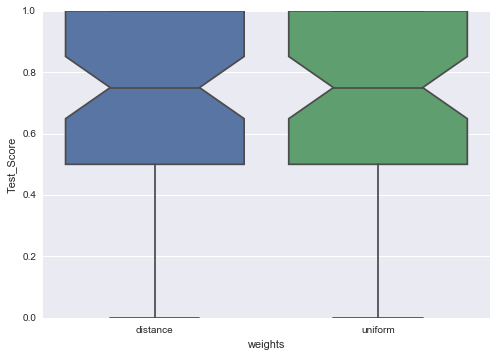

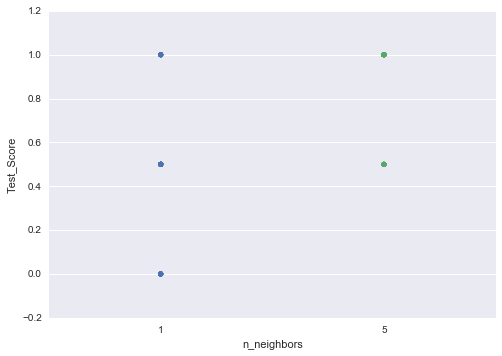

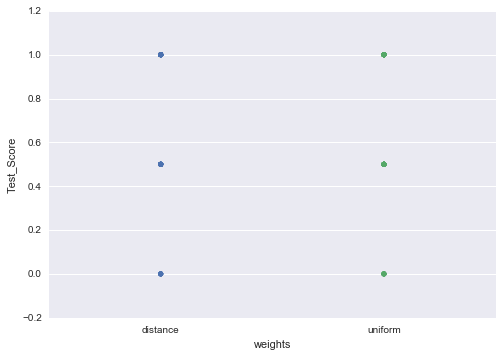

In [39]:
# Loop through the entire files in the folder, open then and run the codes....

indir = '../Cleaned_Method_Wise_Data/KNeighborsClassifier_cleaned/'
for root, dirs, filenames in os.walk(indir):
     for f in filenames:
        print(f)
        Dataset_Cleaned_Data = pd.read_pickle(indir+f)
        plt.figure()   
        sns.boxplot(data=Dataset_Cleaned_Data, x='n_neighbors', y='Test_Score', notch='T')
        sns.plt.title(f)
        plt.figure() 
        sns.boxplot(data=Dataset_Cleaned_Data, x='weights', y='Test_Score', notch='T')
        plt.figure() 
        sns.stripplot(x="n_neighbors", y="Test_Score", data=Dataset_Cleaned_Data)
        plt.figure() 
        sns.stripplot(x="weights", y="Test_Score", data=Dataset_Cleaned_Data)
        lm = smf.ols(formula='Test_Score ~ n_neighbors + weights', data=Dataset_Cleaned_Data).fit()
        print(lm.summary())

Analysis